In [44]:
from matplotlib import pyplot as plt
import os
import json
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sentence_transformers import SentenceTransformer

%matplotlib ipympl

In [ ]:
with open(os.path.join("..", "data", "channels_info.json"), "r") as f:
    channels_info = json.load(f)

Encoding names

In [28]:
sbert_model = SentenceTransformer('bert-base-nli-mean-tokens')
name_embeddings = sbert_model.encode([' '.join(name.split("-")) for name in channels_info.keys()])
name_to_vec = {k:v for k,v in zip(channels_info.keys(), name_embeddings)}

In [30]:
print(name_embeddings.shape)

(266, 768)


Dimension reduction

In [47]:
unit_name_embeddings = StandardScaler().fit_transform(name_embeddings)

# XY
pca = PCA(n_components=2)
name_XY = pca.fit_transform(unit_name_embeddings)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

name_to_xy = {k:v for k,v in zip(channels_info.keys(), name_XY)}

# XYZ
pca = PCA(n_components=3)
name_XYZ = pca.fit_transform(unit_name_embeddings)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

name_to_xyz = {k:v for k,v in zip(channels_info.keys(), name_XYZ)}

[0.10010094 0.07152743]
[143.00146  120.880905]
[0.10010097 0.07152745 0.04964381]
[143.0015  120.88093 100.70568]


Plotting

c:\Users\321lu\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


(-16.20061182975769, 31.87965178489685, -16.62397780418396, 26.63521304130554)

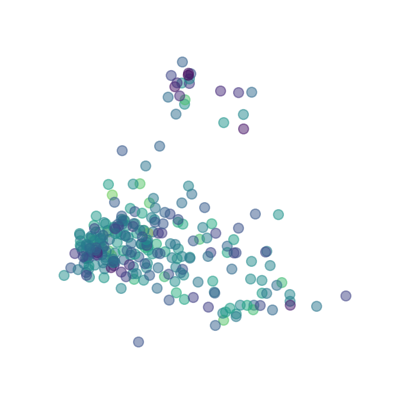

In [55]:
fig, ax = plt.subplots(1,1, figsize=(4,4))

X = [name_to_xy[name][0] for name in channels_info]
Y = [name_to_xy[name][1] for name in channels_info]
# c = [np.log(dic["Video views"]) for dic in channels_info.values()]
c = [np.log(dic["Subscribers"]) for dic in channels_info.values()]
ax.scatter(X, Y, c=c, s=50, alpha=.5)
ax.axis("Off")

c:\Users\321lu\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


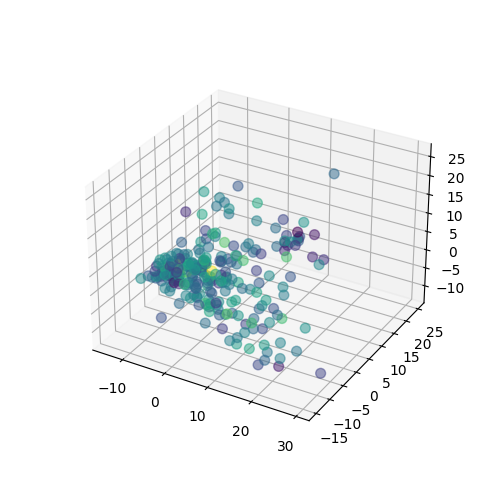

In [56]:
fig, ax = plt.subplots(1,1, figsize=(5,5), subplot_kw=dict(projection='3d'))

X = [name_to_xyz[name][0] for name in channels_info]
Y = [name_to_xyz[name][1] for name in channels_info]
Z = [name_to_xyz[name][2] for name in channels_info]
# c = [np.log(dic["Video views"]) for dic in channels_info.values()]
c = [np.log(dic["Subscribers"]) for dic in channels_info.values()]
ax.scatter(X, Y, Z, c=c, s=50, alpha=.5)
# ax.axis("Off")